In [4]:
import csv
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import scipy.io 
import random
A=[]
N=0

def preprocess_file():
    global A
    global N
    file = open("/content/drive/MyDrive/elec.csv","r")
    csv_reader = csv.reader(file, delimiter=',')
    nodes=0
    for row in csv_reader:
        A.append(list(map(int, row)))
    print(len(A))
    print(len(A[0]))
    A=np.array(A)
    print(A)
    N=len(A)

def main():
	preprocess_file()

if __name__=="__main__":
    main()

7118
7118
[[ 0  1 -1 ...  0  0  0]
 [ 1  0 -1 ...  0  0  0]
 [-1 -1  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [2]:
positive_deg = np.sum(A==1,axis=1) 
Total_positive=np.sum(positive_deg)
negative_deg = np.sum(A==-1,axis=1)
Total_negative=np.sum(negative_deg)
m=int((np.sum(abs(A)))/2)
R=Total_negative/Total_positive
cor_r= np.corrcoef(positive_deg,negative_deg)
T=[0]*5
for i in range(N):
    for j in range(i+1,N):
        if(A[i][j]!=0):
            for k in range(j+1,N):
                if(A[i][k]!=0 and A[j][k]!=0):
                    T[4]+=1
                    if(A[i][k]==1 and A[j][k]==1  and  A[i][j]==1):
                        T[3]+=1
                    elif((A[i][k]==1 and A[j][k]==1 and A[i][j]==-1) or (A[i][k]==1 and A[j][k]==-1 and A[i][j]==1) or (A[i][k]==-1 and A[j][k]==1 and A[i][j]==1)):
                        T[2]+=1
                    elif((A[i][k]==1 and A[j][k]==-1 and A[i][j]==-1) or (A[i][k]==-1 and A[j][k]==1 and A[i][j]==-1) or (A[i][k]==-1 and A[j][k]==-1 and A[i][j]==1)):
                        T[1]+=1
                    elif((A[i][k]==-1 and A[j][k]==-1 and A[i][j]==-1)):
                        T[0]+=1

frac_unbalanced=(T[0]+T[2])/T[4]

print("N = "+str(len(A)))
print("M = "+str(m))
print("R (Ratio of negative to positive edges) = "+str(R))
print("Cr (Correlation between positive and negative degree) ="+str(cor_r[1][0]))
print("fr (Fraction of unbalanced triangles) ="+str(frac_unbalanced))

N = 7118
M = 100722
R (Ratio of negative to positive edges) = 0.2807741459661883
Cr (Correlation between positive and negative degree) =0.6363444159882947
fr (Fraction of unbalanced triangles) =0.23659141844193526


Correlation Coefficient:- 0.6363444159882947
[8009, 55942, 135668, 407660, 607279]
epsilon: 0.0496841978728064
a11: 1
a12: 0.6363444159882947
a21: 0.17866905993946633
a22: 0.2807741459661883
Gamma: 2.05
Delta Plus: 0.8793318406736813
Delta Minus: 0.12066815932631869
p: 0.67
beta: 0.13


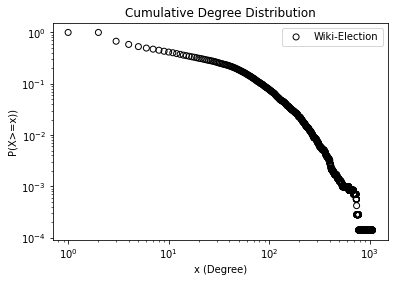

In [5]:

def calculate_triangles(A):
    N=len(A)
    total=0
    T=[0]*5
    for i in range(N):
        for j in range(i+1,N):
            if(A[i][j]!=0):
                for k in range(j+1,N):
                    if(A[i][k]!=0 and A[j][k]!=0):
                        T[4]+=1
                        if(A[i][k]==1 and A[j][k]==1  and  A[i][j]==1):
                            T[3]+=1
                        elif((A[i][k]==1 and A[j][k]==1 and A[i][j]==-1) or (A[i][k]==1 and A[j][k]==-1 and A[i][j]==1) or (A[i][k]==-1 and A[j][k]==1 and A[i][j]==1)):
                            T[2]+=1
                        elif((A[i][k]==1 and A[j][k]==-1 and A[i][j]==-1) or (A[i][k]==-1 and A[j][k]==1 and A[i][j]==-1) or (A[i][k]==-1 and A[j][k]==-1 and A[i][j]==1)):
                            T[1]+=1
                        elif((A[i][k]==-1 and A[j][k]==-1 and A[i][j]==-1)):
                            T[0]+=1
    print(T)
    return T

def main():
    N=len(A)

    degree=np.sum(abs(A),axis=1)
    scipy.io.savemat("./wiki-election.mat",{'degree':degree})
    deg_pos=np.count_nonzero(A==1,axis=1)
    deg_neg=np.count_nonzero(A==-1,axis=1)
    alpha=np.corrcoef(deg_pos,deg_neg)
    print("Correlation Coefficient:- "+str(alpha[1][0]))
    # The below function was run and the found values are now hardcoded
    # T=calculate_triangles(A)
    T=[8009,55942,135668,407660,607279]
    print(T)
    epsilon=(T[0]+T[2])/T[4]
    epsilon*=0.21
    print("epsilon: "+str(epsilon))
    
    #Matrix coefficeints
    a11=1
    a12=a11*alpha[1][0]
    a22=a11*(np.sum(deg_neg)/np.sum(deg_pos))
    a21=a22*alpha[1][0]
    print("a11: "+str(a11))
    print("a12: "+str(a12))
    print("a21: "+str(a21))
    print("a22: "+str(a22))
    
    # Obtained from running the matlab function 
    # [gamma,xmin,L]=plfit(degree)
    Gamma=2.05
    print("Gamma: "+str(Gamma))
    
    #Delta-Plus and DeltaMinus
    dPlus=(T[3])/(T[3]+T[1])
    dMinus=1-dPlus
    print("Delta Plus: "+str(dPlus))
    print("Delta Minus: "+str(dMinus))
    
    
    beta=0
    beta1=0
    p=0
    p1=0
    Error=N
    # Caculating the values of beta and p
    # That give the least error 
    for i in range(1,100):
        beta=beta+(1/100)
        for j in range(100):
            p=p+(1/100)
            c1=0.5
            c2=dMinus/dPlus
            c11= (beta*a11)/2 + (1-beta)*p*dPlus + (epsilon*p)/(1-epsilon)
            c12= (beta*a12)/2 + (1-beta)*p*dPlus*c2 + (epsilon*p)/(1-epsilon)
            c21= (beta*a21)/2 + (1-beta)*p*dPlus*c1*c2 + (c2*2*epsilon*p)/(1-epsilon)
            c22= (beta*a22)/2 + (1-beta)*p*dPlus*c1
            error=(c11 - (1/(Gamma - 1)))*(c22 - (1/(Gamma - 1))) - c12*c21
            if(Error > abs(error)):
                Error=abs(error)
                p1=p
                beta1=beta
    
    p1=0.67
    beta1=0.13
    print("p: "+str(p1))
    print("beta: "+str(beta1))
    
    
    # Degree Distribution Probability
    D_DistN=np.bincount(degree)
    max_degree=np.max(degree)
    D_DistN=D_DistN/np.sum(D_DistN)
    
    #Cumulative Degree Distribution (P(X>=x))
    cumdegree=np.zeros((max_degree,1))
    for i in range(max_degree):
        cumdegree[i]=np.sum(D_DistN[i:])
    index=list(range(1,max_degree+1))
  
    fig, ax = plt.subplots()
    ax.scatter(index, cumdegree, facecolors='none', edgecolors='black')
    ax.set_xscale("log")
    ax.set_yscale("log");
    plt.xlabel("x (Degree)")
    plt.ylabel("P(X>=x))")
    plt.legend(["Wiki-Election"])
    plt.title("Cumulative Degree Distribution")
    plt.show()

if __name__ == "__main__":
    main()

Streaming output truncated to the last 5000 lines.
2285
2286
2287
2288
2289
2290
2291
2292
2293
2293
2294
2295
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2426
2427
2428
2428
2429
2430
2431
2432
2433
2434
2435
2435
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466

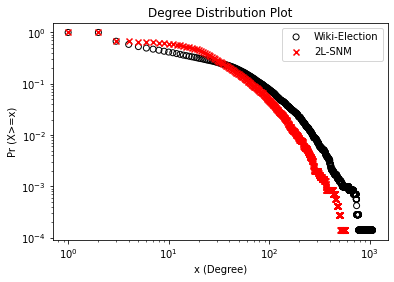

In [6]:

def getColumns(Mat,j):
    ans=[]
    N=len(Mat)
    for i in range(N):
      if(Mat[i][j]==1):
        ans.append(i)
    return ans
def model_2LSNM(A):
    N=len(A)
    T=[8009,55942,135668,407660,607279]
    a11=1
    a12=0.6363444159882947
    a21=0.17866905993946633
    a22=0.2807741459661883
    d_p=0.8793318406736813
    epsilon=0.21*0.23659141844193526
    p=0.67
    Beta=0.165
    

    L1=np.zeros((N,N),dtype=int)
    L2=np.zeros((N,N),dtype=int)
    i=4;
    L1[1][2]=L1[2][1]=1
    L1[3][2]=L1[2][3]=1
    L1[4][2]=L1[2][4]=1
    L1[1][3]=L1[3][1]=1
    L1[4][3]=L1[3][4]=1    
    L2[1][4]=L2[4][1]=1
    
    degree=np.sum(abs(A),axis=1)
    leaf_freq=len(np.argwhere(degree==1))
    while(i<N):
        print(i)
        growth_allowed=True
        pPlus=p
        beta=Beta
        dPlus=np.sum(L1,axis=1)
        dMinus=np.sum(L2,axis=1)
        deltaP=T[3]/(T[1]+T[3])
        deltaN=1-deltaP
        if(i > N-leaf_freq):
            pPlus=0
            beta=0
            growth_allowed=False
            p1=np.add(a11*dPlus,a12*dMinus)
            p1=p1/i
            p2=np.add(a21*dPlus,a22*dMinus)
            p2=p2/i
            
            i+=1
            failed=1
            while(failed):
                for j in range(i-1):
                    if((random.random()<=p1[j]) & (L2[i-1][j]==0)):
                        failed=0
                        L1[i-1][j]=1
                        L1[j][i-1]=1
                        break
            continue
        

        pMinus=p/2
        if(random.random()<=(1-epsilon)): # A new node will appear
            # Process-I
            if(random.random()<=beta):

                p1=np.add(a11*dPlus,a12*dMinus)
                p1=p1/i
                p2=np.add(a21*dPlus,a22*dMinus)
                p2=p2/i
                i+=1
                success=0
                while(success!=1):
                    for j in range(i-1):
                        rr=random.random()
                        if(rr <=0.5):
                            #Positive Link
                            rrr=random.random()
                            if((rrr<=p1[j]) & (L2[i-1][j]==0)):
                                success=1
                                L1[i-1][j]=L1[j][i-1]=1
                        else:
                            #negative link
                            if((random.random()<=p2[j]) & (L1[i-1][j]==0)):
                                success=1
                                L2[i-1][j]=L2[j][i-1]=1
            
            ##Process II
            else:
                i=i+1
                j=random.randint(0,i-2)
                Nb1=getColumns(L1,j)
                Nb2 = getColumns(L2,j)

                if(random.random()<=deltaN):
                    L2[i-1][j]=1
                    L2[j][i-1]=1
                    for k in range(len(Nb1)): #-+-
                        if((random.random()<=pMinus) & (L1[i-1][Nb1[k]]==0)):
                            L2[i-1][Nb1[k]]=1
                            L2[Nb1[k]][i-1]=1

                    for k in range(len(Nb2)):#--
                        if((random.random()<=pPlus) & L2[i-1][Nb2[k]]==0):
                            L1[i-1][Nb2[k]]=1
                            L1[Nb2[k]][i-1]=1
                else:
                    L1[i-1][j]=1
                    L1[j][i-1]=1
                    for k in range(len(Nb1)): #+++
                        if((random.random()<=pPlus) & (L2[i-1][Nb1[k]]==0)):
                            L1[i-1][Nb1[k]]=1
                            L1[Nb1[k]][i-1]=1

                    for k in range(len(Nb2)):#+--
                        if((random.random()<=pMinus) & (L1[i-1][Nb2[k]]==0)):
                            L2[i-1][Nb2[k]]=1
                            L2[Nb2[k]][i-1]=1
        else:
            #Process III - Internal Growth Process (No new node will appear)
            x=random.randint(0,i-2)
            Nb1=getColumns(L1,x)
            Nb2=getColumns(L2,x)
            if(random.random()<=0.5):
                #Positive Layer
                for k in range(len(Nb1)):   #++-
                    Nbb1=getColumns(L1,Nb1[k])
                    if not Nbb1:
                        for y in range(len(Nbb1)):
                            if((random.random()<pMinus) & (L1[x][Nbb1[y]]==0) & (L2[x][Nbb1[y]]==0)):
                                L2[x][Nbb1[y]]=1
                                L2[Nbb1[y]][x]=1
                                break;
                
                for k in range(len(Nb1)):  #+-+
                    Nbb2=getColumns(L2,Nb1[k])
                    if not Nbb2:
                        for y in range(len(Nbb2)):
                            if((random.random()<pPlus) & (L2[x][Nbb2[y]]==0) & (L2[x][Nbb2[y]]==0)):
                                L1[x][Nbb1[y]]=1
                                L1[Nbb1[y]][x]=1
                                break;
            else:
                #Negative Layer
                for k in range(len(Nb2)):   #-++
                    Nbb1=getColumns(L1,Nb2[k])
                    if not Nbb1:
                        for y in range(len(Nbb1)):
                            if((random.random()<pPlus) & (L1[x][Nbb1[y]]==0) & (L2[x][Nbb1[y]]==0)):
                                L1[x][Nbb1[y]]=1
                                L1[Nbb1[y]][x]=1
                                break;
                
                for k in range(len(Nb2)):   #---
                    Nbb2=getColumns(L2,Nb2[k])
                    if not Nbb2:
                        for y in range(len(Nbb2)):
                            if((random.random()<pMinus) & (L1[x][Nbb2[y]]==0) & (L2[x][Nbb2[y]]==0)):
                                L2[x][Nbb2[y]]=1
                                L2[Nbb2[y]][x]=1
                                break;
            
    print("Model execution Finished:")
    print(L1)
    print(L2)
    L=np.subtract(L1,L2)
    return L

def plotLogLog(A,ax,m,facecolors='black',edgecolors='face'):
    degree=np.sum(abs(A),axis=1)
    deg_pos=np.count_nonzero(A==1,axis=1)
    deg_neg=np.count_nonzero(A==-1,axis=1)
    
    D_DistN=np.bincount(degree)
    max_degree=np.max(degree)
    D_DistN=D_DistN/np.sum(D_DistN)
    
    cumdegree=np.zeros((max_degree,1))
    for i in range(max_degree):
        cumdegree[i]=np.sum(D_DistN[i:])
    index=list(range(1,max_degree+1))
    
    ax.scatter(index, cumdegree,marker=m,facecolors=facecolors, edgecolors=edgecolors)
    ax.set_xscale("log")
    ax.set_yscale("log");
    return ax

def calculate_Distribution(A):
    degree=np.sum(abs(A),axis=1)
    deg_pos=np.count_nonzero(A==1,axis=1)
    deg_neg=np.count_nonzero(A==-1,axis=1)
    
    D_DistN=np.bincount(degree)
    max_degree=np.max(degree)
    D_DistN=D_DistN/np.sum(D_DistN)
    
    cumdegree=np.zeros((max_degree,1))
    for i in range(max_degree):
        cumdegree[i]=np.sum(D_DistN[i:])
    return (cumdegree,D_DistN)

def calculate_error(X,Y):
    error=0
    if(len(X)<=len(Y)):
      for i in range(len(X)):
        error+=abs((1-X[i])-(1-Y[i]))
      for i in range(len(X),len(Y)):
        error+=Y[i]
    else: 
      return calculate_error(Y,X)
    return error


def calculate_triangles(A):
    N=len(A)
    total=0
    T=[0]*5
    for i in range(N):
        for j in range(i+1,N):
            if(A[i][j]!=0):
                for k in range(j+1,N):
                    if(A[i][k]!=0 and A[j][k]!=0):
                        T[4]+=1
                        if(A[i][k]==1 and A[j][k]==1  and  A[i][j]==1):
                            T[3]+=1
                        elif((A[i][k]==1 and A[j][k]==1 and A[i][j]==-1) or (A[i][k]==1 and A[j][k]==-1 and A[i][j]==1) or (A[i][k]==-1 and A[j][k]==1 and A[i][j]==1)):
                            T[2]+=1
                        elif((A[i][k]==1 and A[j][k]==-1 and A[i][j]==-1) or (A[i][k]==-1 and A[j][k]==1 and A[i][j]==-1) or (A[i][k]==-1 and A[j][k]==-1 and A[i][j]==1)):
                            T[1]+=1
                        elif((A[i][k]==-1 and A[j][k]==-1 and A[i][j]==-1)):
                            T[0]+=1
    print(T)
    return T


def calculate_performance(G,A):
    print("\n\nPerformance parameters")
    print("Fraction of Triads in real model:")
    T_r=calculate_triangles(A)
    
    f_r=[x/T_r[4] for x in T_r]
    for i in range(4):
        print("T"+str(i)+": " +str(f_r[i]))
    print("Fraction of Triads in generated model:")
    T_g=calculate_triangles(G)
    f_g=[x/T_g[4] for x in T_g]

    error=[abs(f_g[i]-f_r[i]) for i in range(4)]
    total_error=np.sum(error)
    for i in range(4):
        print("T"+str(i)+": " +str(f_g[i])+ " Error:"+str(error[i]))
    print("Absolute Error:"+str(total_error))

    TB=T_g[3]+T_g[1]
    TBr=T_r[3]+T_r[1]
    TUB=T_g[2]+T_g[0]
    TUBr=T_r[2]+T_r[0]
    Csr=(TBr-TUBr)/T_r[4]
    Cs=(TB-TUB)/T_g[4]
    print()
    print("Clustering Coefficient of real graph Cs(G): "+ str(Csr))
    print("Clustering Coefficient 2L-SNM Cs(G): "+ str(Cs))
    Sg=(TB-TUB)/(TB+TUB)
    Sgr=(TBr-TUBr)/(TBr+TUBr)
    print("Relative Signed Clustering Coefficient of real graph S(G): "+ str(Sgr))
    print("Relative Signed Clustering Coefficient of 2L-SNM S(G): "+ str(Sg))

def main():
    N=len(A)
    cumdegree , D_DistN =calculate_Distribution(A)
    Generated_Graph=model_2LSNM(A)
    cumdegree_G,D_DistN_G =calculate_Distribution(Generated_Graph)
    error=calculate_error(cumdegree,cumdegree_G)
    print("Error: "+str(error))
    
    calculate_performance(Generated_Graph,A)
    fig, ax = plt.subplots()
    ax=plotLogLog(A,ax,'o','None','black')
    ax=plotLogLog(Generated_Graph,ax,'x','red')
    plt.xlabel('x (Degree)')
    plt.ylabel('Pr (X>=x)')
    plt.legend(["Wiki-Election","2L-SNM"])
    plt.title("Degree Distribution Plot")
    name="Wiki-Election error="+str(error)+").jpg"
    plt.savefig(name)
    plt.show()
    
                
if __name__=="__main__":
    main()

# New Section